# Decision tree


### Iris dataset example

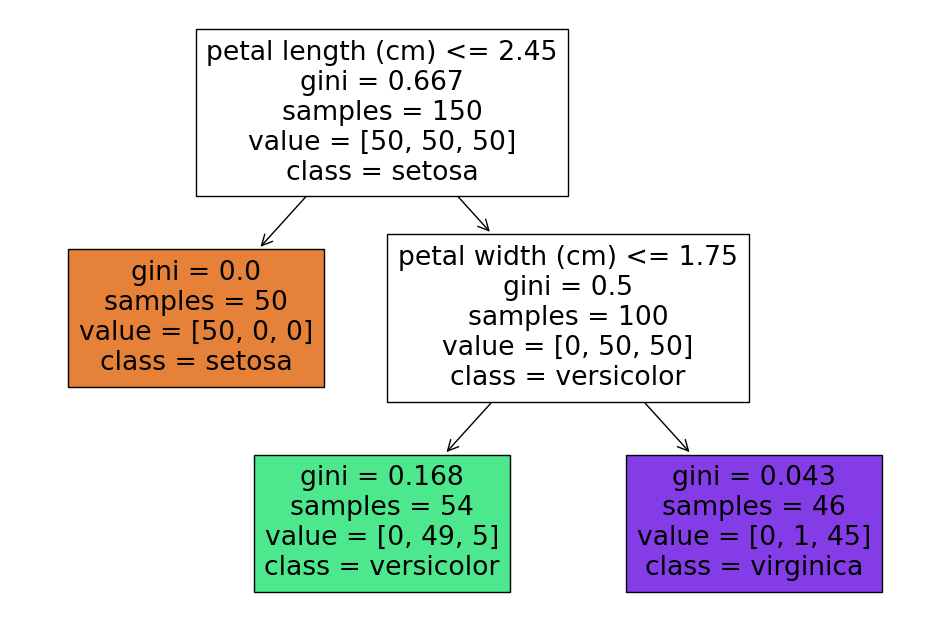

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Load the Iris dataset
iris = load_iris()

# Initialize the DecisionTreeClassifier with a maximum depth of 2
clf = DecisionTreeClassifier(max_depth=2)

# Fit the model to the dataset
clf.fit(iris.data, iris.target)

# Plot the resulting decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

### Titanic dataset example

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


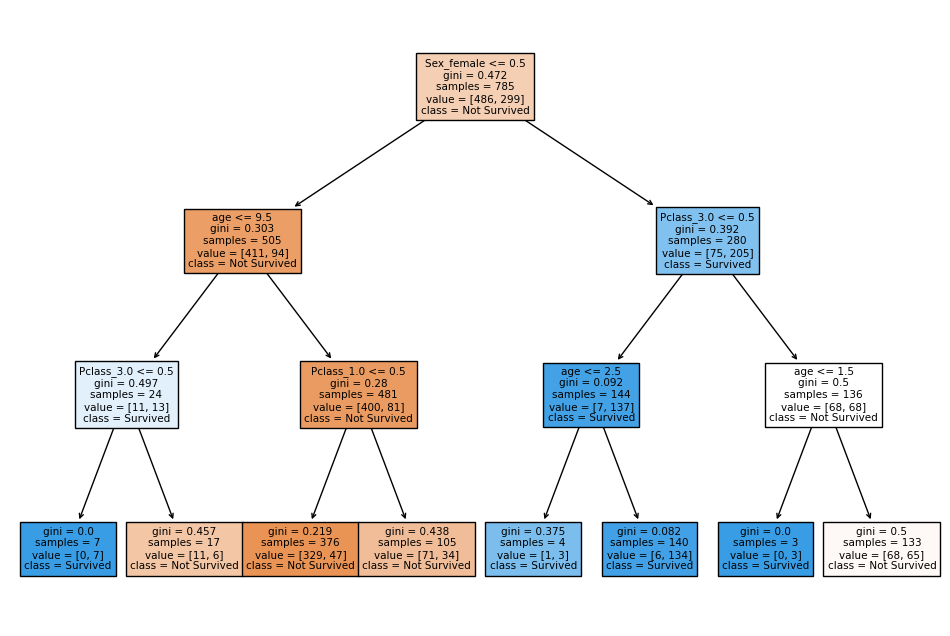

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Step 1: Import Libraries and Load Data
data = fetch_openml('titanic', version=1, as_frame=True)['frame']

# One-hot encode the 'Sex' feature
sex_dummies = pd.get_dummies(data['sex'], prefix='Sex')

# Handle missing values for 'Age'
data['age'].fillna(data['age'].median(), inplace=True)

# One-hot encode the 'Embarked' feature
embarked_dummies = pd.get_dummies(data['embarked'], prefix='Embarked')

# One-hot encode the 'Pclass' feature
pclass_dummies = pd.get_dummies(data['pclass'], prefix='Pclass')

# Combine the one-hot encoded columns with the original dataset
data = pd.concat([data, sex_dummies, embarked_dummies, pclass_dummies], axis=1)

# Selecting features and target including the one-hot encoded features
features = ['age'] + list(sex_dummies.columns) + list(embarked_dummies.columns) + list(pclass_dummies.columns)
X = data[features]
y = data['survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Create a Decision Tree classifier with max_depth=3
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, y_train)

# Visualizing the decision tree
plt.figure(figsize=(12,8))
plot_tree(classifier, filled=True, feature_names=features, class_names=['Not Survived', 'Survived'])
plt.show()

Decision Tree Performance vs Max Depth

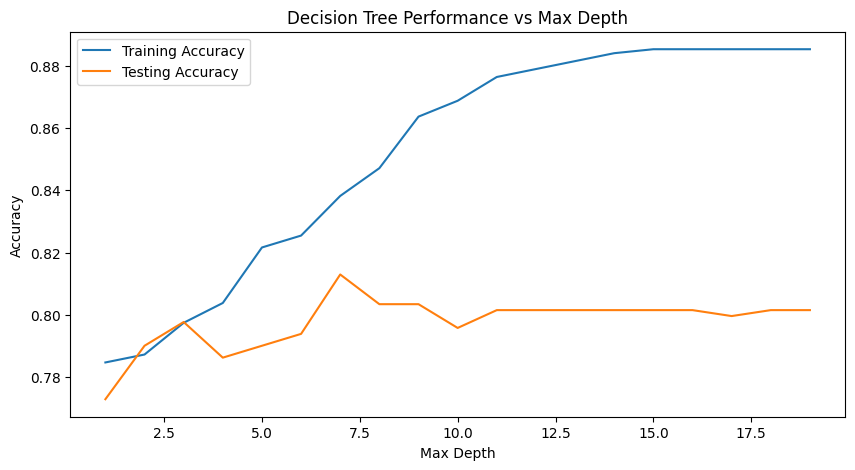

In [3]:
from sklearn.metrics import accuracy_score

# We will vary the max_depth from 1 to 10 and record the training and testing accuracy
max_depth_range = range(1, 20)
train_accuracies = []
test_accuracies = []

for depth in max_depth_range:
    # Create a Decision Tree classifier with the current max_depth
    classifier = DecisionTreeClassifier(max_depth=depth)
    classifier.fit(X_train, y_train)

    # Predict on the training set and calculate accuracy
    train_preds = classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_preds)
    train_accuracies.append(train_accuracy)

    # Predict on the testing set and calculate accuracy
    test_preds = classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_preds)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(max_depth_range, train_accuracies, label='Training Accuracy')
plt.plot(max_depth_range, test_accuracies, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance vs Max Depth')
plt.legend()
plt.show()